In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-paper")  # or seaborn-v0_8-whitegrid
sns.set_context("paper", font_scale=1.5)
# set the legend for the figures to have a similar background to the normal style
sns.set_style("whitegrid", {"legend.frameon": True})

# Load the data
df = pd.read_csv('../NEAT_logged_data_60hz.csv')

In [19]:
df.head()

,speed,attempt_id,step,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,...,sensor11,sensor12,sensor13,sensor14,action_L,action_R,angular_velocity,angular_acceleration,line_position,deviation
0,100,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,41.581688,41.666603,0.000008,0.000480,6.5,-0.5
1,100,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,83.163376,83.333206,0.000016,0.000480,6.5,-0.5
2,100,0,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,99.796052,99.999847,0.000019,0.000192,6.5,-0.5
3,100,0,3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,99.796052,99.999847,0.000019,0.000000,6.5,-0.5
4,100,0,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,99.796052,99.999847,0.000019,0.000000,6.5,-0.5


In [3]:
attempt_time = df.groupby([df['speed'], df['attempt_id']])['step'].max() / 60
attempt_time

speed  attempt_id
100    0             59.933333
150    0             45.083333
200    0             44.150000
250    0             41.500000
300    0             48.200000
350    0             44.816667
400    0             41.850000
450    0             42.600000
500    0             40.350000
Name: step, dtype: float64

In [4]:
attempt_time.groupby(level='speed').min()

speed
100    59.933333
150    45.083333
200    44.150000
250    41.500000
300    48.200000
350    44.816667
400    41.850000
450    42.600000
500    40.350000
Name: step, dtype: float64

In [5]:
attempt_time.groupby(level='speed').max()

speed
100    59.933333
150    45.083333
200    44.150000
250    41.500000
300    48.200000
350    44.816667
400    41.850000
450    42.600000
500    40.350000
Name: step, dtype: float64

In [6]:
attempt_time.groupby(level='speed').std()

speed
100   NaN
150   NaN
200   NaN
250   NaN
300   NaN
350   NaN
400   NaN
450   NaN
500   NaN
Name: step, dtype: float64

In [69]:
# Define sensor columns
sensor_columns = [f'sensor{i}' for i in range(15)]

# Calculate line position based on active sensors
def calculate_line_position(row):
    active_sensors = [i for i, col in enumerate(sensor_columns) if row[col] == 1]
    return np.mean(active_sensors) if active_sensors else np.nan

df['line_position'] = df.apply(calculate_line_position, axis=1)

# Forward fill missing positions within each attempt
df['line_position'] = df.groupby('speed')['line_position'].ffill()

In [81]:
df['line_position'].head(5)

0    6.5
1    6.5
2    6.5
3    6.5
4    6.5
Name: line_position, dtype: float64

C:\Users\Pc\AppData\Local\Temp\ipykernel_21368\3463805063.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='speed', y='deviation', data=df, palette='viridis')


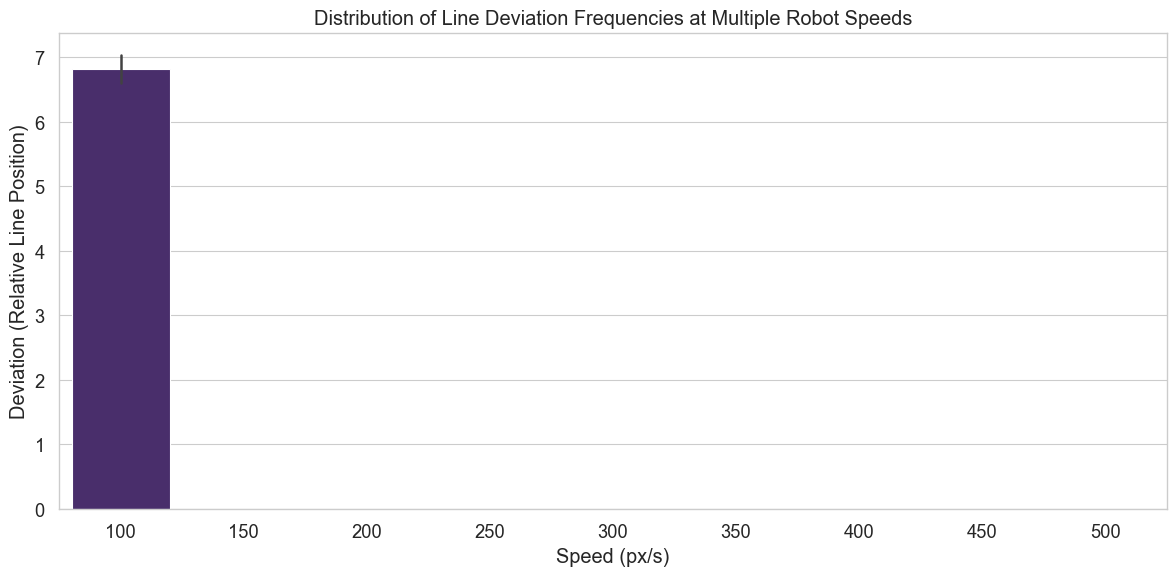

Negative deviation indicates the line is to the left of center (robot veering left), positive deviation indicates the line is to the right (robot veering right).


In [65]:
center_sensor = 7  # For 15 sensors, index 7 is the center
df['deviation'] = df['line_position']

plt.figure(figsize=(12, 6))
sns.barplot(x='speed', y='deviation', data=df, palette='viridis')
plt.title('Distribution of Line Deviation Frequencies at Multiple Robot Speeds')
plt.xlabel('Speed (px/s)')
plt.ylabel('Deviation (Relative Line Position)')
plt.tight_layout()
plt.show()
print("Negative deviation indicates the line is to the left of center (robot veering left), positive deviation indicates the line is to the right (robot veering right).")

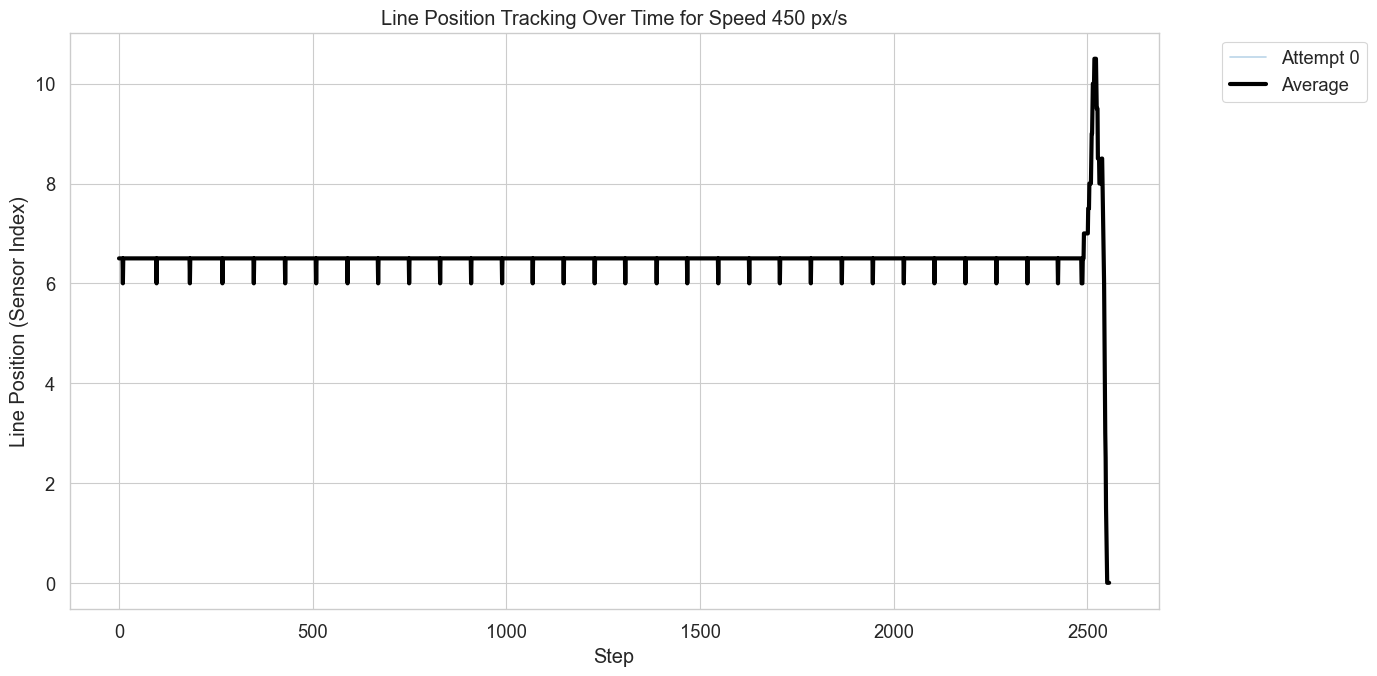

In [10]:
# Time Series Visualization
plt.figure(figsize=(14, 7))

speed_450_df = df[df['speed'] == 450]  
attempt_ids = speed_450_df['attempt_id'].unique()

# Plot individual attempts
for attempt_id in attempt_ids:
    attempt_data = speed_450_df[speed_450_df['attempt_id'] == attempt_id]
    plt.plot(attempt_data['step'], attempt_data['line_position'],
             alpha=0.3, label=f'Attempt {attempt_id}')

# Calculate and plot average line position
average_line = speed_450_df.groupby('step')['line_position'].mean()
plt.plot(average_line.index, average_line.values,
         color='black', linewidth=3, label='Average')

plt.title('Line Position Tracking Over Time for Speed 450 px/s')
plt.xlabel('Step')
plt.ylabel('Line Position (Sensor Index)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]),
 [Text(0, 0.5, 'sensor0'),
  Text(0, 1.5, 'sensor1'),
  Text(0, 2.5, 'sensor2'),
  Text(0, 3.5, 'sensor3'),
  Text(0, 4.5, 'sensor4'),
  Text(0, 5.5, 'sensor5'),
  Text(0, 6.5, 'sensor6'),
  Text(0, 7.5, 'sensor7'),
  Text(0, 8.5, 'sensor8'),
  Text(0, 9.5, 'sensor9'),
  Text(0, 10.5, 'sensor10'),
  Text(0, 11.5, 'sensor11'),
  Text(0, 12.5, 'sensor12'),
  Text(0, 13.5, 'sensor13'),
  Text(0, 14.5, 'sensor14')])

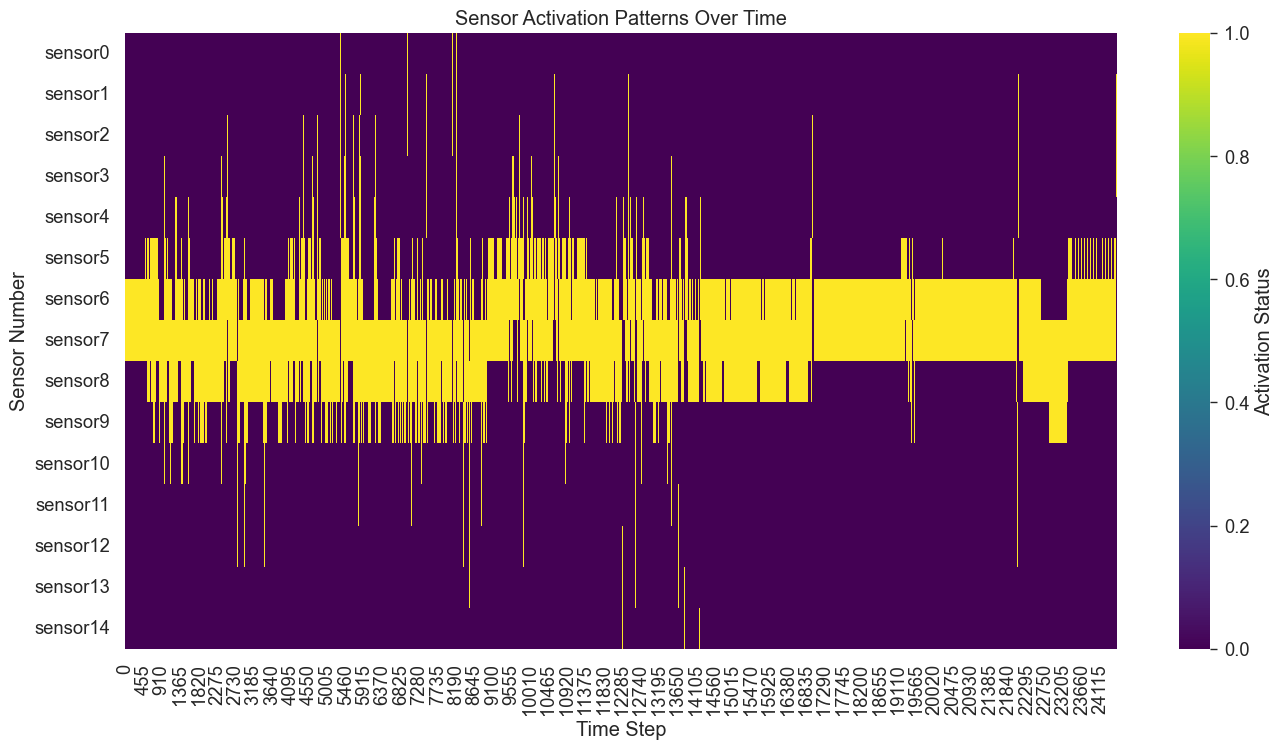

In [11]:
plt.figure(figsize=(16, 8))
sns.heatmap(df[sensor_columns].T, cmap='viridis', 
            cbar_kws={'label': 'Activation Status'})
plt.title('Sensor Activation Patterns Over Time')
plt.xlabel('Time Step')
plt.ylabel('Sensor Number')
plt.yticks(rotation=0)

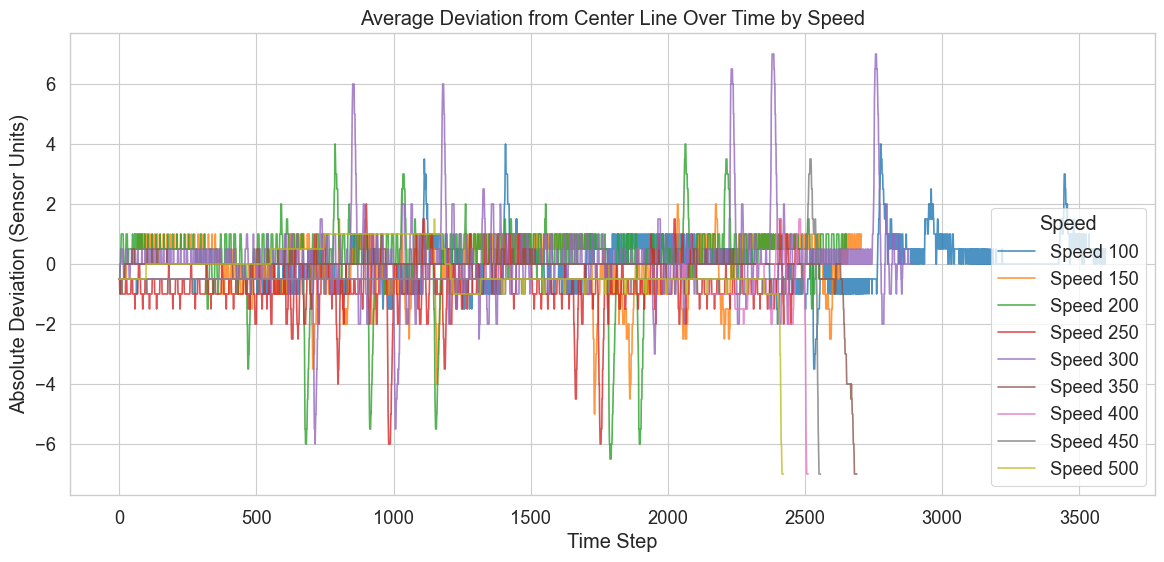

In [12]:
center_sensor = 7  # For 15 sensors, index 7 is the center
df['deviation'] = df['line_position'] - center_sensor

plt.figure(figsize=(14, 6))
for speed in df['speed'].unique():
    speed_data = df[df['speed'] == speed]
    avg_deviation = speed_data.groupby('step')['deviation'].mean()
    plt.plot(avg_deviation.index, avg_deviation.values, label=f'Speed {speed}', alpha=0.8)

plt.title('Average Deviation from Center Line Over Time by Speed')
plt.ylabel('Absolute Deviation (Sensor Units)')
plt.xlabel('Time Step')
plt.legend(title='Speed')
plt.show()


Text(0.5, 1.0, 'Correlation Matrix of Sensors and Control Signals')

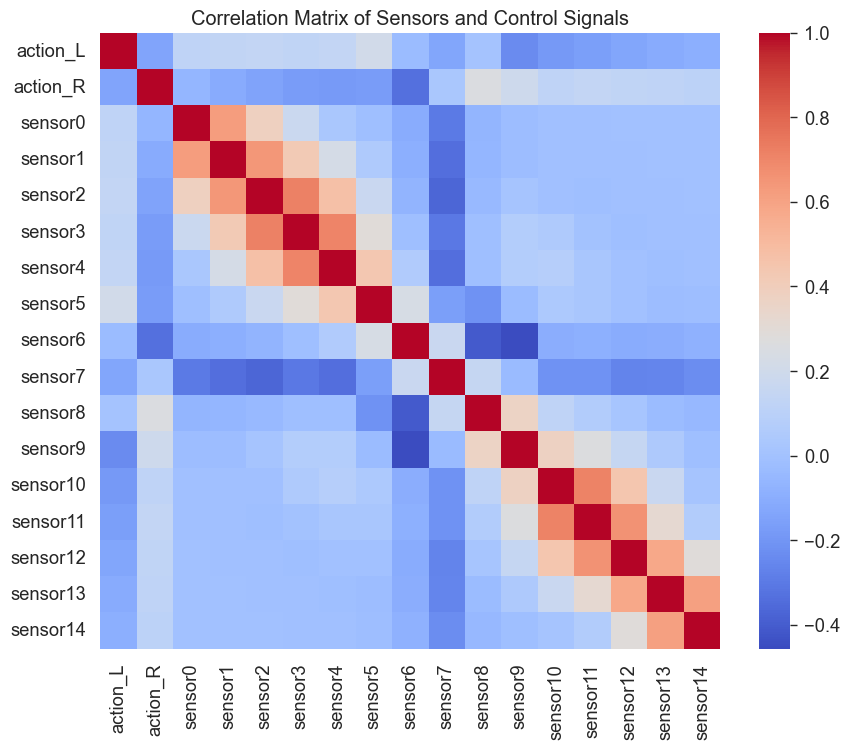

In [13]:
plt.figure(figsize=(10, 8))
corr_matrix = df[['action_L', 'action_R'] + sensor_columns].corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Sensors and Control Signals')

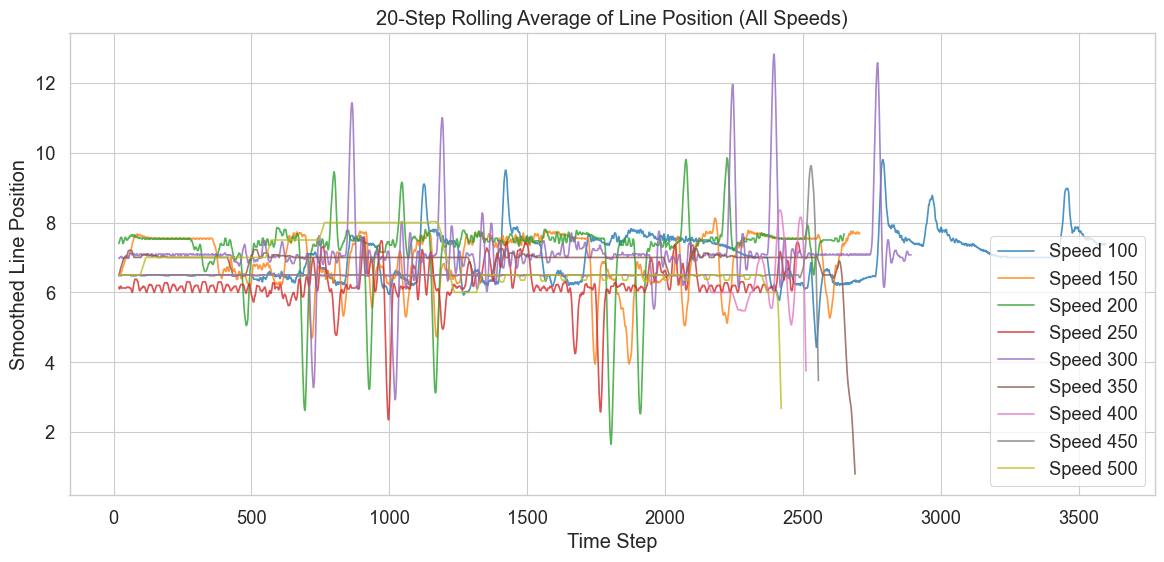

In [14]:
window_size = 20  # Use the existing variable if you want to change window size

plt.figure(figsize=(14, 6))
for speed in df['speed'].unique():
    speed_data = df[df['speed'] == speed]
    rolling = speed_data['line_position'].rolling(window=window_size).mean()
    plt.plot(speed_data['step'], rolling, alpha=0.8, label=f'Speed {speed}')
plt.title(f'{window_size}-Step Rolling Average of Line Position (All Speeds)')
plt.xlabel('Time Step')
plt.ylabel('Smoothed Line Position')
plt.legend()
plt.show()


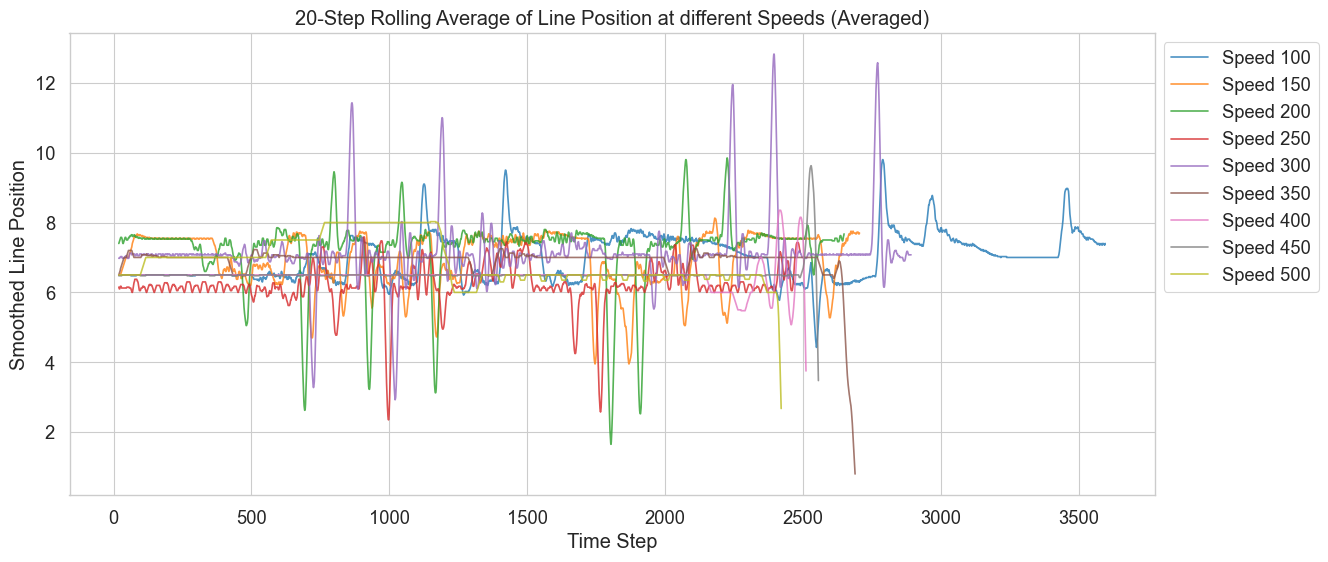

In [56]:
plt.figure(figsize=(14, 6))
for speed in df['speed'].unique():
    speed_data = df[df['speed'] == speed]
    avg_rolling = speed_data.groupby('step')['line_position'].mean().rolling(window=window_size).mean()
    plt.plot(avg_rolling.index, avg_rolling.values, alpha=0.8, label=f'Speed {speed}')

plt.title(f'{window_size}-Step Rolling Average of Line Position at different Speeds (Averaged)')
plt.xlabel('Time Step')
plt.ylabel('Smoothed Line Position')
plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left')
plt.show()


In [ ]:
df_grouped_speed = df.groupby('speed')[['action_L', 'action_R']].sum().reset_index()
df_grouped_speed

,speed,action_L,action_R
0,100,233571.199998,249464.350310
1,150,233157.600195,248880.197529
2,200,235588.503791,251412.676669
3,250,234216.930456,251010.363793
4,300,236632.540703,252534.559723
5,350,73227.923614,55505.109108
6,400,57317.858694,57335.792366
7,450,72894.101305,52754.035207
8,500,55534.051661,57707.471155


C:\Users\Pc\AppData\Local\Temp\ipykernel_21368\2983752753.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_grouped_speed['speed'], y=actions_diff_speed, palette="coolwarm")


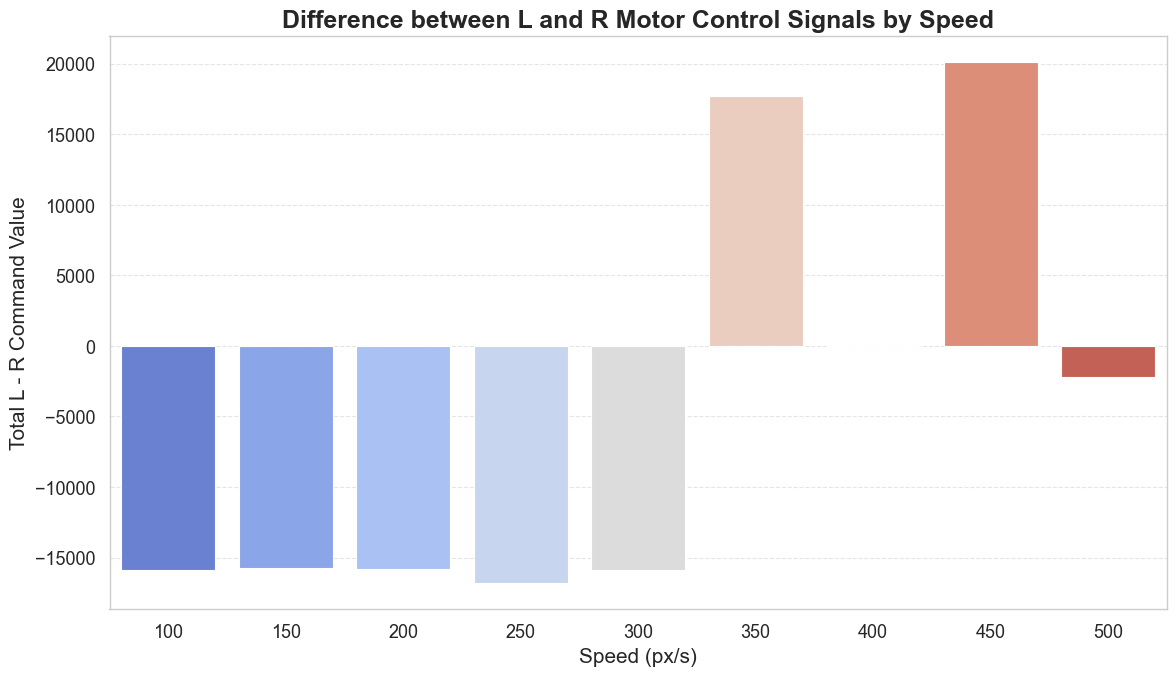

In [35]:

actions_diff_speed = df_grouped_speed['action_L'] - df_grouped_speed['action_R']
plt.figure(figsize=(12, 7))
sns.barplot(x=df_grouped_speed['speed'], y=actions_diff_speed, palette="coolwarm")
plt.title('Difference between L and R Motor Control Signals by Speed', fontsize=18, weight='bold')
plt.xlabel('Speed (px/s)', fontsize=15)
plt.ylabel('Total L - R Command Value', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Average cumulative error for speed 100: -260.2150403113706
Average cumulative error for speed 150: -31.596003589906022
Average cumulative error for speed 200: 324.4771698113208
Average cumulative error for speed 250: -1013.4381009730266
Average cumulative error for speed 300: 105.72329761493259
Average cumulative error for speed 350: -48.397026022304836
Average cumulative error for speed 400: -638.3724124203821
Average cumulative error for speed 450: -646.3490418459132
Average cumulative error for speed 500: 98.96800165152766


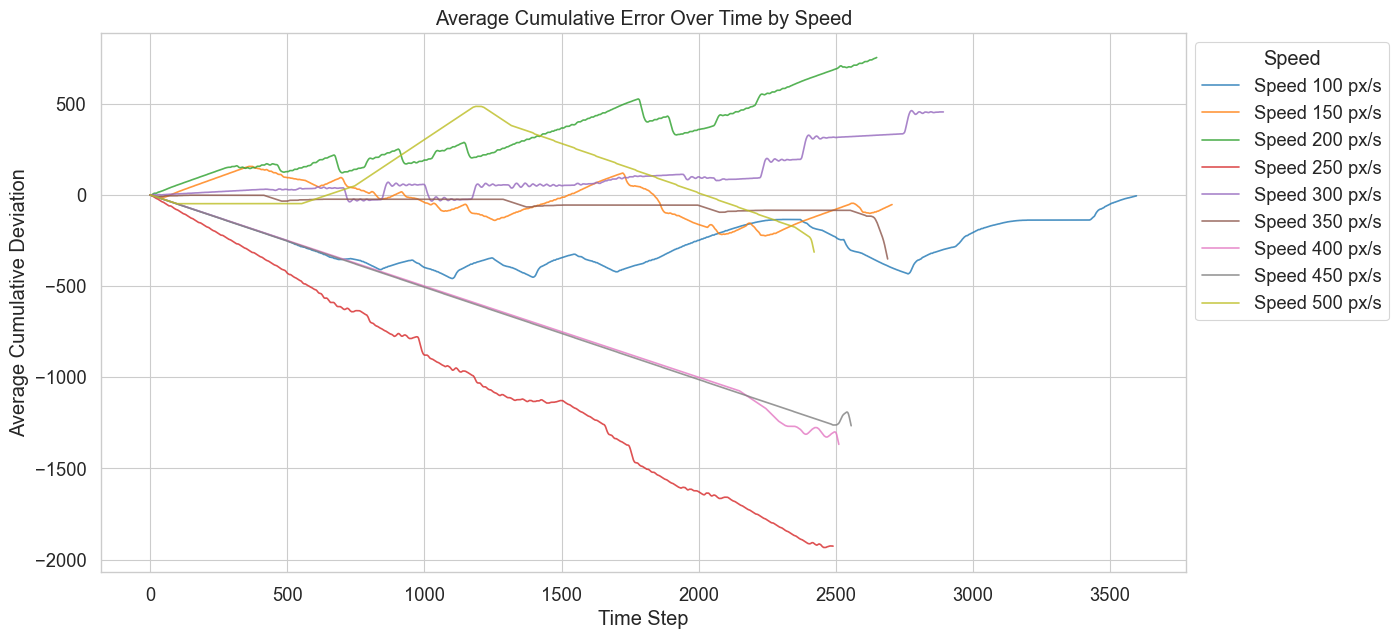

In [43]:
plt.figure(figsize=(14, 7))
for speed in df['speed'].unique():
    speed_data = df[df['speed'] == speed]
    # Compute average deviation per step across all attempts for this speed
    avg_deviation = speed_data.groupby('step')['deviation'].mean()
    avg_cumulative_error = avg_deviation.cumsum()
    plt.plot(avg_cumulative_error.index, avg_cumulative_error.values, label=f'Speed {speed} px/s', alpha=0.8)
    print(f"Average cumulative error for speed {speed}: {avg_cumulative_error.mean()}")

plt.title('Average Cumulative Error Over Time by Speed')
plt.xlabel('Time Step')
plt.ylabel('Average Cumulative Deviation')
plt.legend(title='Speed', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()


In [ ]:
results = []

for speed in df['speed'].unique():
    print(f"Processing speed: {speed}")
    speed_data = df[df['speed'] == speed]
    total_error = speed_data['deviation'].sum()
    rmse = np.sqrt(np.mean(np.square(speed_data['deviation'])))
    duration = speed_data['step'].max() / 60

    std_total_error = speed_data['deviation'].std()
    std_rmse = np.std(np.sqrt(np.square(speed_data['deviation'])))
    std_duration = np.nan  # Only one attempt, so std is not meaningful

    results.append({
        'Speed': speed,
        'Total Error': f"{total_error:.3f} (±{std_total_error:.3f})",
        'RMSE': f"{rmse:.3f} (±{std_rmse:.3f})",
        'Time (s)': f"{duration:.3f}"
    })

metrics_df = pd.DataFrame(results)
print("Metrics Per Speed:\n")
print(metrics_df.to_string(index=False))
speed_data


Processing speed: 100
Processing speed: 150
Processing speed: 200
Processing speed: 250
Processing speed: 300
Processing speed: 350
Processing speed: 400
Processing speed: 450
Processing speed: 500
Metrics Per Speed:

 Speed        Total Error           RMSE Time (s)
   100    -6.000 (±0.757) 0.757 (±0.503)   59.933
   150   -53.786 (±0.905) 0.905 (±0.595)   45.083
   200   752.500 (±1.182) 1.216 (±0.959)   44.150
   250 -1926.544 (±0.871) 1.165 (±0.737)   41.500
   300   454.000 (±1.276) 1.286 (±1.121)   48.200
   350  -352.000 (±0.676) 0.688 (±0.669)   44.817
   400 -1368.500 (±0.512) 0.747 (±0.451)   41.850
   450 -1266.500 (±0.501) 0.705 (±0.439)   42.600
   500  -314.500 (±0.767) 0.778 (±0.529)   40.350


,speed,attempt_id,step,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,...,sensor11,sensor12,sensor13,sensor14,action_L,action_R,angular_velocity,angular_acceleration,line_position,deviation
22096,500,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.297476,5.654148e-09,-0.000028,-0.001683,6.5,-0.5
22097,500,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.594952,1.130830e-08,-0.000056,-0.001683,6.5,-0.5
22098,500,0,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.892429,1.696244e-08,-0.000084,-0.001683,6.5,-0.5
22099,500,0,3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.189905,2.261659e-08,-0.000112,-0.001683,6.5,-0.5
22100,500,0,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.487381,2.827074e-08,-0.000140,-0.001683,6.5,-0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24513,500,0,2417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,214.705131,3.839151e+02,0.015954,0.001683,0.0,-7.0
24514,500,0,2418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,214.407655,3.839151e+02,0.015982,0.001683,0.0,-7.0
24515,500,0,2419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,214.110178,3.839151e+02,0.016010,0.001683,0.0,-7.0
24516,500,0,2420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,213.812702,3.839151e+02,0.016038,0.001683,0.0,-7.0


In [ ]:
attempt_time.max() / 60  # Maximum step for speed 500 in minutes

0.9988888888888888

In [ ]:
attempt_time.groupby(level='speed').min() / 60  # Maximum step for each speed in minutes

speed
100    0.998889
150    0.751389
200    0.735833
250    0.691667
300    0.803333
350    0.746944
400    0.697500
450    0.710000
500    0.672500
Name: step, dtype: float64